In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Documents\\tesla.csv")
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,07-01-2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,07-02-2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,07-06-2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [4]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Volume,Adj Close
0,0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,19.000000,25.00,17.540001,23.889999,18766300
1,1,25.790001,30.42,23.299999,23.830000,17187100
2,2,25.000000,25.92,20.270000,21.959999,8218800
3,3,23.000000,23.10,18.709999,19.200001,5139800
4,4,20.000000,20.00,15.830000,16.110001,6866900


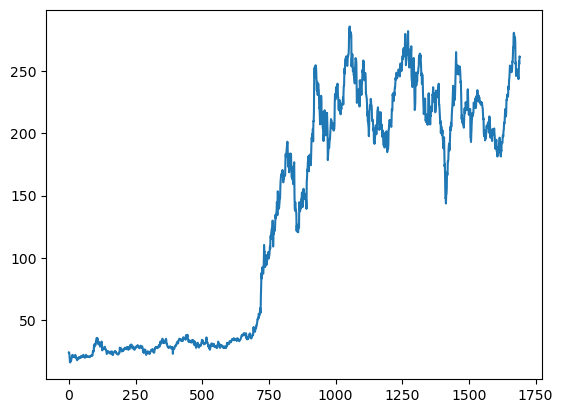

In [6]:
plt.plot(df.Close)

In [7]:
df

,index,Open,High,Low,Close,Volume
0,0,19.000000,25.000000,17.540001,23.889999,18766300
1,1,25.790001,30.420000,23.299999,23.830000,17187100
2,2,25.000000,25.920000,20.270000,21.959999,8218800
3,3,23.000000,23.100000,18.709999,19.200001,5139800
4,4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,1687,244.820007,246.850006,242.779999,246.169998,3010700
1688,1688,246.110001,258.119995,246.020004,258.000000,7575500
1689,1689,257.000000,261.000000,254.270004,255.729996,4816600
1690,1690,262.399994,265.750000,259.059998,262.049988,7100400


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1687    222.2524
1688    222.8414
1689    223.3631
1690    223.9926
1691    224.6067
Name: Close, Length: 1692, dtype: float64

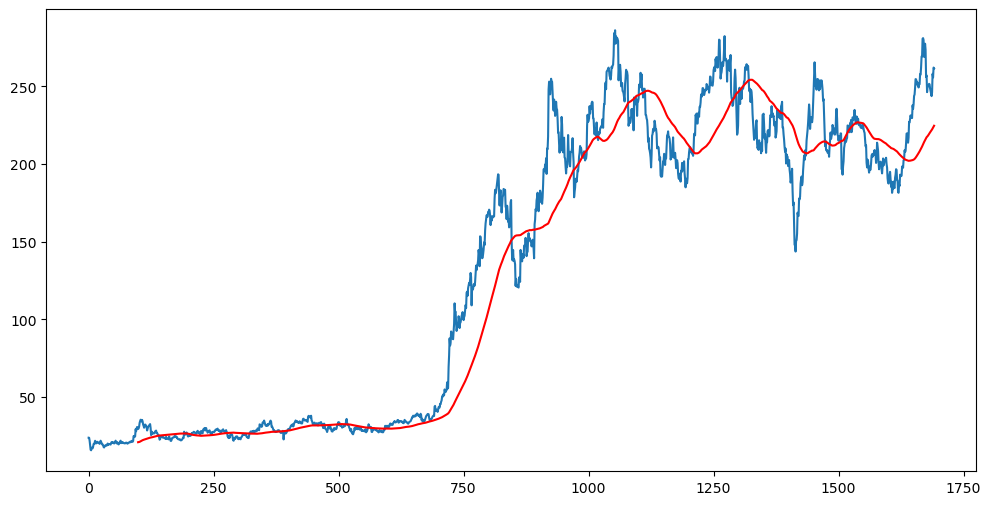

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1687    218.54195
1688    218.70635
1689    218.86980
1690    219.06390
1691    219.27360
Name: Close, Length: 1692, dtype: float64

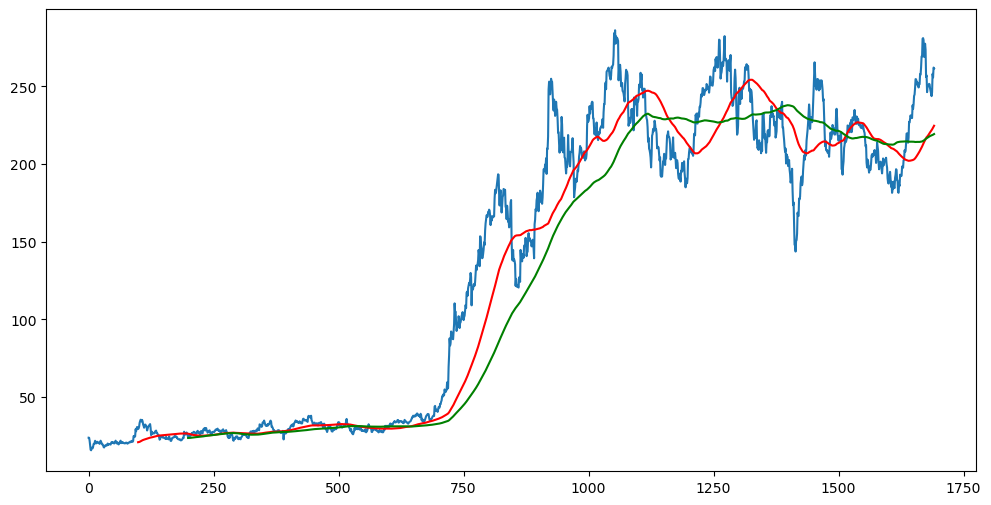

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(1692, 6)

In [13]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1184, 1)
(508, 1)


In [14]:
data_testing.head()

,Close
1184,188.679993
1185,195.699997
1186,194.729996
1187,200.710007
1188,195.649994


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.64579633],
       [0.65845174],
       [0.64857164]])

In [17]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i-0])
x_train ,y_train=np.array(x_train),np.array(y_train)  

In [20]:
import tensorflow as tf

ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.